# <a> **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

import re
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

> ## Load the data from drive

In [ ]:
%%capture
!gdown --folder https://drive.google.com/drive/folders/1smyA1HcMasGntkDJXVN24roEH9pYkO_T?usp=sharing

# <a> **Important methods**


> This method is used to calculate the number of missing values and the ratio of these values

In [ ]:
def miss_number(df):
  # summary of the number of nulls and count the ratio of missing values
  total_miss = df.isnull().sum()
  percent_miss = (total_miss/df.isnull().count()*100)

  # sort attributes by missing value ratio
  missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
  missing_data = missing_data.sort_values(by='Total missing',ascending=False)

  return missing_data

> This method is to display the data distribution

In [ ]:
def distribution(x):
  plt.figure(figsize=(15,5), facecolor='#FF5A5F')
  sns.set(palette="muted", color_codes=True)
  sns.distplot(x, color = '#0A0F1C')
  plt.show()

> This method is to display outliers data

In [ ]:
def outlierPlot(x, column_name):
  # Figure size and theme
  plt.figure(figsize=(15,6), facecolor='#FF5A5F')

  # Plot the data
  sns.boxplot(x)

  plt.title(column_name + ' distribution',fontsize=15)
  plt.show()

> This method is to display the data distribution

In [ ]:
# plot method
def dist_plot(X, column_name , Num):
  plt.figure(figsize=(15,8), facecolor='#FF5A5F')
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=X.value_counts().head(Num).index, y=X.value_counts().head(Num).values)
  plt.xticks(rotation='45', fontsize=14, fontweight='bold')
  plt.xlabel(column_name, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')
  plt.grid()
  plt.show()

# <a> **Calender**


> ## **Data reading**

In [ ]:
# cal_ams = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DA/Final_Project/Amsterdam - Netherlands/calendar.csv.gz")
calendar = pd.read_csv("Toronto - Canada/calendar.csv.gz")

In [ ]:
# print(cal_ams.shape)
print(calendar.shape)

(5569545, 7)


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569545 entries, 0 to 5569544
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 297.4+ MB


> ## **Data Description**

> Basic stats for the dataset

In [ ]:
#general summary of dataset
calendar.describe(include='all', datetime_is_numeric=True).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_id,5569545.0,NaN,NaN,NaN,30905528.009626,15613202.423684,1419.0,18359404.0,32492784.0,44504326.0,53684479.0
date,5569545,366,2022-11-27,15260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available,5569545,2,f,3562103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,5569541,1400,$100.00,197527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adjusted_price,5569541,1406,$100.00,194613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,5569181.0,NaN,NaN,NaN,26.549617,40.527858,1.0,5.0,28.0,28.0,1212.0
maximum_nights,5569181.0,NaN,NaN,NaN,488623.124597,31177558.352984,1.0,365.0,1125.0,1125.0,2147483647.0


In [ ]:
# columns data type
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569545 entries, 0 to 5569544
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 297.4+ MB


> ### **Duplicates**

> In this part, we will check if there is any duplication to deal with it

In [ ]:
#check if there exist anu true value to check for duplications
calendar.duplicated(subset = None).value_counts()

False    5569545
dtype: int64

> As we can see, We don't have any duplicate value

> ### **Missing values**

> In this part, we will check if there is any missing values to deal with them

In [ ]:
#display the all columns with the number of missing values
miss_number(calendar)

,Total missing,% missing
minimum_nights,364,0.006536
maximum_nights,364,0.006536
price,4,0.000072
adjusted_price,4,0.000072
listing_id,0,0.000000
date,0,0.000000
available,0,0.000000


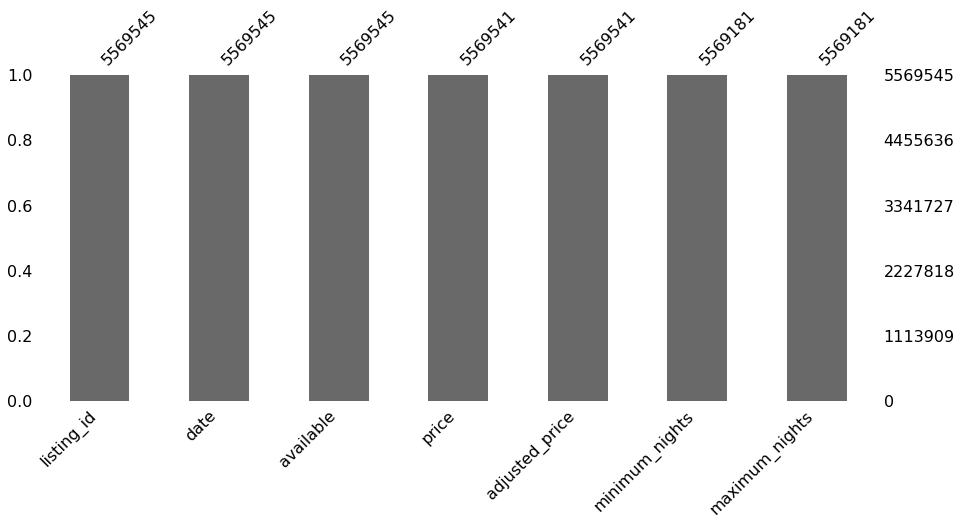

In [ ]:
#bar chart
msno.bar(calendar, figsize=(15,6))

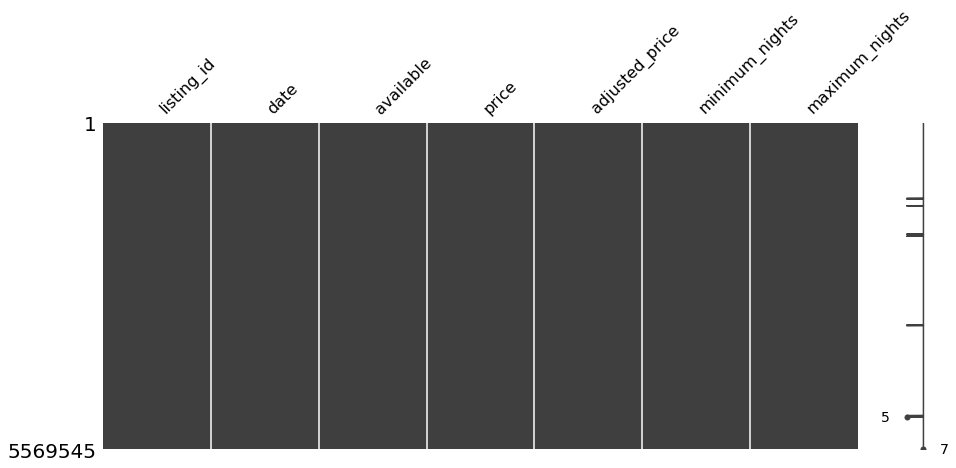

In [ ]:
#visualize missing values as a matrix
msno.matrix(calendar, figsize=(15,6))

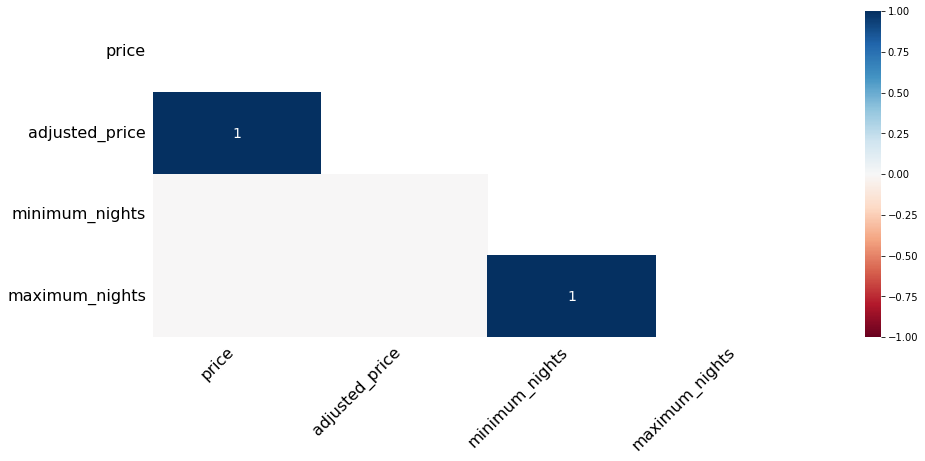

In [ ]:
#visualize missing values as a missing correlation
msno.heatmap(calendar, figsize=(15,6))

> As we can see, We have `364` records are missing in `[minimum_nights, maximum_nights]` columns out of `5569545`, So we will drop them

> As we can also see, We have `4` records are issing in `[price, adjusted_price]` columns out of `5569545`, So we will drop them


In [ ]:
#Drop all records containing null values
calendar.dropna(axis='rows', inplace = True)

In [ ]:
#Checking for nulls
miss_number(calendar)

,Total missing,% missing
listing_id,0,0.0
date,0,0.0
available,0,0.0
price,0,0.0
adjusted_price,0,0.0
minimum_nights,0,0.0
maximum_nights,0,0.0


> As we can see, now we don't have any missing values

> ## **Data Preprocessing**

> ### **date**

> Converting the `date column` from `object` to `date`

In [ ]:
#all unique values
len(calendar['date'].value_counts())

366

In [ ]:
# convert to date
calendar['date'] = pd.to_datetime(calendar['date'], format="%Y-%m-%d")

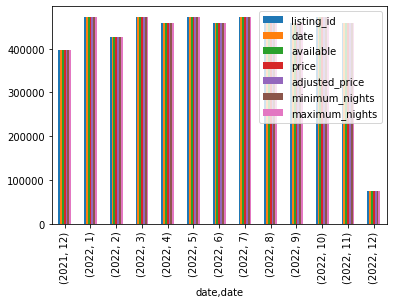

In [ ]:
#the distribution of the all data over the all months
calendar.groupby([calendar["date"].dt.year, calendar["date"].dt.month]).count().plot(kind="bar")

> ### **available**

In [ ]:
#display the all unique values for available column
calendar.available.value_counts()

f    3561898
t    2007279
Name: available, dtype: int64

> `f` for False

> `t` for True

>Convert available column to 1 if available and 0 if not.

In [ ]:
#convert the column to 0's and 1's
calendar['available'] = calendar.available.map( lambda x: 0 if x == 'f' else 1)

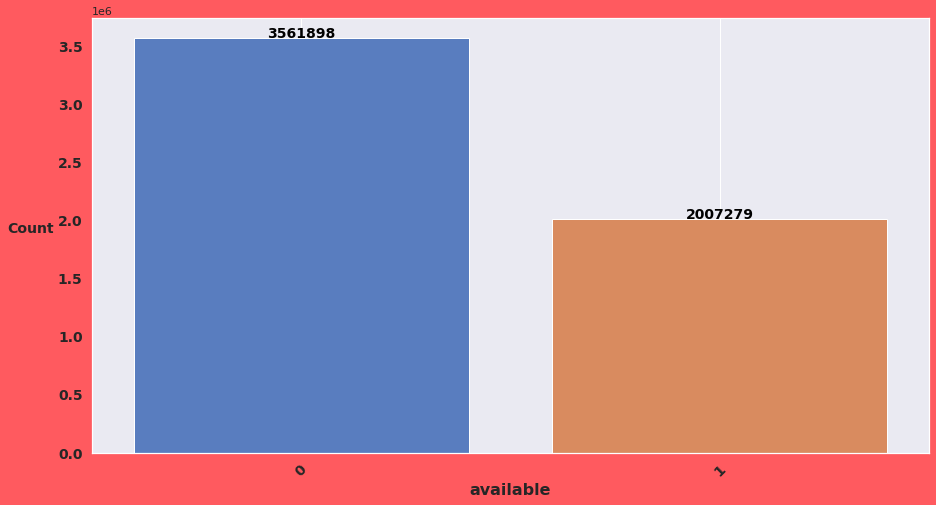

In [ ]:
# display the data distribution
dist_plot(calendar.available,'available', 2)

> ### **price**

In [ ]:
# all unique values for price column
calendar.price.value_counts()

$100.00      197527
$150.00      171246
$120.00      129883
$50.00       125603
$200.00      125330
              ...  
$1,080.00         1
$1,268.00         1
$1,082.00         1
$1,089.00         1
$1,839.00         1
Name: price, Length: 1400, dtype: int64

In [ ]:
# The number of the unique values
len(calendar.price.value_counts())

1400

In [ ]:
# the type of this column
calendar['price'].dtypes

dtype('O')

> As we can see, the price column is an `Object` column, So we need to convert it to a `float` column

In [ ]:
#convert price from object to flaot
calendar['price'] = calendar['price'].str.replace(',', '', regex=True)
calendar['price'] = calendar['price'].str.replace('$', '', regex=True)
calendar['price'] = calendar['price'].astype(float)

In [ ]:
# all unique values for price column
calendar.price.value_counts()

100.0     197527
150.0     171246
120.0     129883
50.0      125603
200.0     125330
           ...  
1080.0         1
1268.0         1
1082.0         1
1089.0         1
1839.0         1
Name: price, Length: 1400, dtype: int64

In [ ]:
# The number of the unique values
len(calendar.price.unique())

1400

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


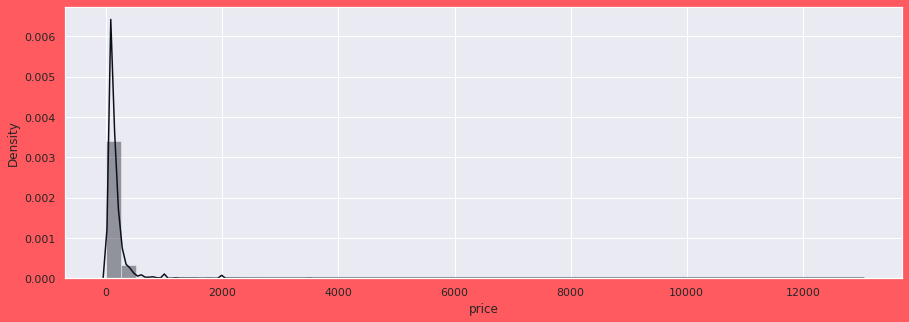

In [ ]:
# display the data distribution
distribution(calendar.price)

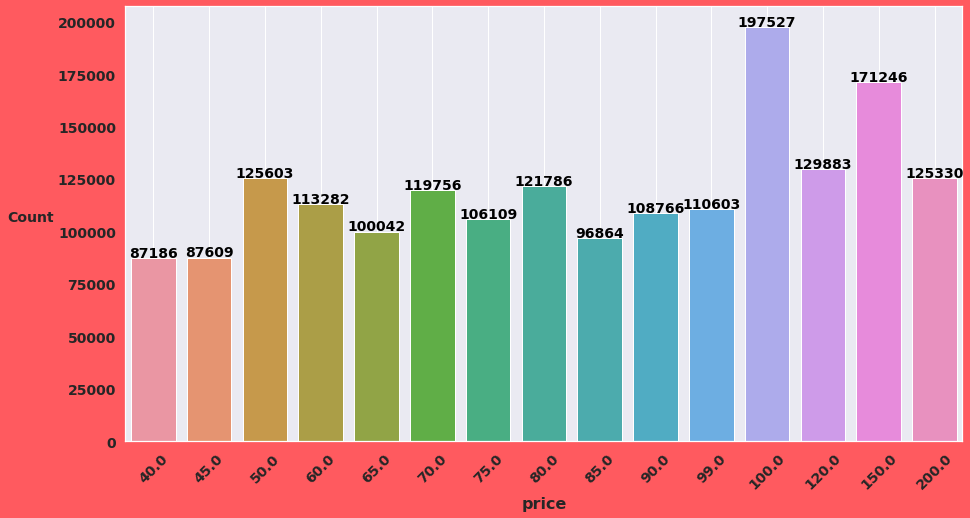

In [ ]:
# display the data distribution
dist_plot(calendar.price,'price', 15)

> The Airbnb price in these places increases in the months of September, October and November. 
> So, these three months are the best months visiting these places

> #### Interquartile Range IQR

>The IQR method is used to highlight outliers in the boxplot. We can use it to find outliers in the dataset.  

> It makes sense to use the interquartile range (IQR) to spot outliers. The IQR is the range of values between the first and third quartiles, i.e., 25th and 75th percentiles, so it will include the majority of the data points in the dataset.

>![](https://miro.medium.com/max/1400/1*RkaxqWyt6FuG2nBI71iGkg.jpeg)

> Any data point lower than the lower bound or greater than the upper bound is an outlier:


> * (data point value) < Q1–1.5xIQR, then it’s an outlier.
   * Min, minimum value in the dataset excluding outliers

>* (data point value) > Q3 + 1.5xIQR, then it’s an outlier.
  * Max, maximum value in the dataset, excluding outliers

[source](https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


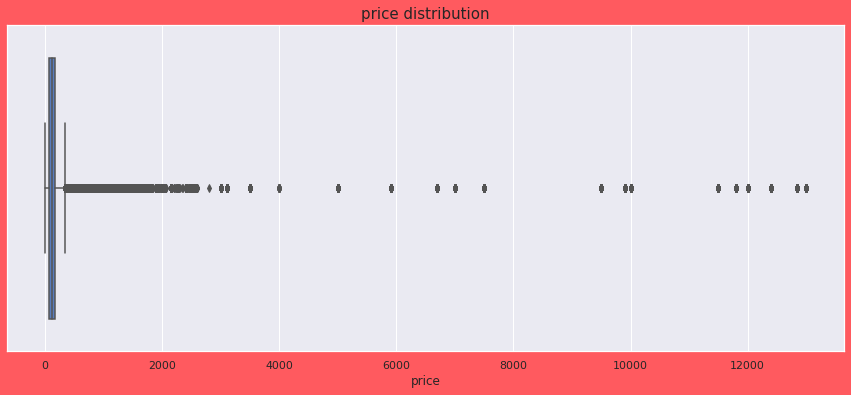

In [ ]:
#checking for outliers
outlierPlot(calendar.price, 'price')

> #### But let's try to remove the outliers from `price` column . 

In [ ]:
# calculate Q1 and Q3
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

In [ ]:
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

calendar[ calendar['price'] > (Q3+1.5*IQR)]
calendar[ calendar['price'] < (Q1-1.5*IQR)]

calendar = calendar[ calendar['price'] < (Q3+1.5*IQR)]
calendar.shape

332.5
-87.5


(5182114, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


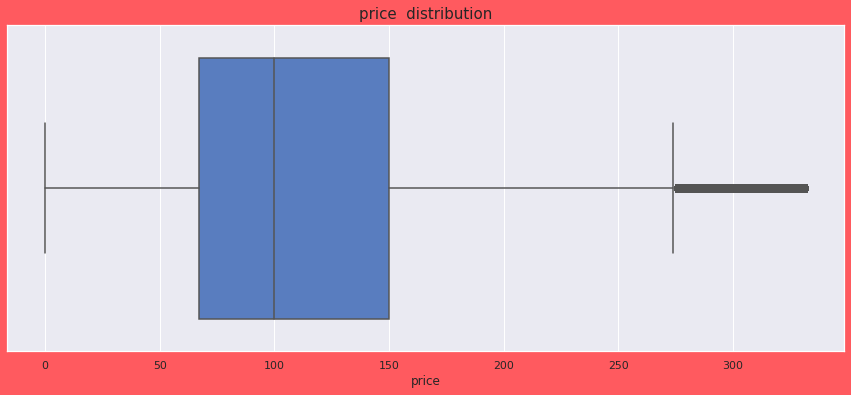

In [ ]:
outlierPlot(calendar.price, 'price ')

In [ ]:
# calculate Q1 and Q3
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
calendar = calendar[ calendar['price'] < (Q3+1.5*IQR)]
calendar.shape

(4968337, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


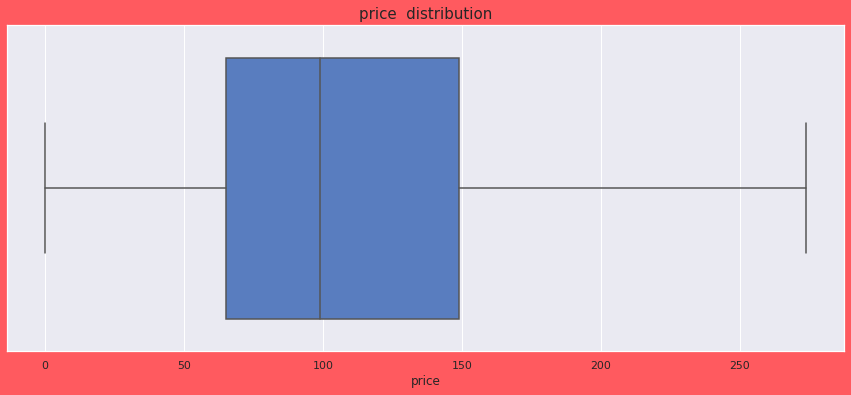

In [ ]:
outlierPlot(calendar.price, 'price ')

> As we can see we don't have any outliers in `price` column.

> ### <A> **Questions**

> <a> **Which months are the best months to visit these places**

Text(0.5, 0, 'average monthly price')

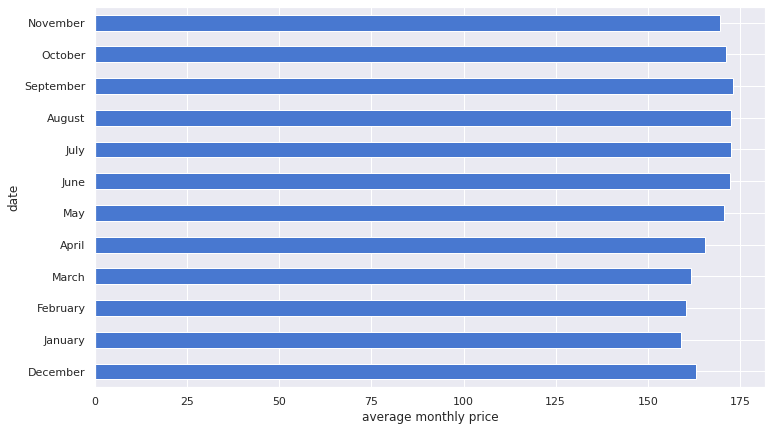

In [ ]:
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'), sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price')

> ### **adjusted_price**

In [ ]:
# all unique values for price column
calendar.adjusted_price.value_counts()

$100.00    194613
$150.00    169702
$120.00    128129
$50.00     125649
$200.00    122973
            ...  
$272.00       214
$10.00        104
$300.00        14
$375.00         6
$12.00          2
Name: adjusted_price, Length: 267, dtype: int64

In [ ]:
# The number of the unique values
len(calendar.adjusted_price.value_counts())

267

In [ ]:
# the type of this column
calendar['adjusted_price'].dtypes

dtype('O')

> As we can see, the `adjusted_price` column is an `Object` column, So we need to convert it to a `float` column

In [ ]:
#convert adjusted_price from object to flaot
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',', '', regex=True)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '', regex=True)
calendar['adjusted_price'] = calendar['adjusted_price'].astype(float)

In [ ]:
# all unique values for price column
calendar.adjusted_price.value_counts()

100.0    194613
150.0    169702
120.0    128129
50.0     125649
200.0    122973
          ...  
272.0       214
10.0        104
300.0        14
375.0         6
12.0          2
Name: adjusted_price, Length: 267, dtype: int64

In [ ]:
# The number of the unique values
len(calendar.adjusted_price.value_counts())

267

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


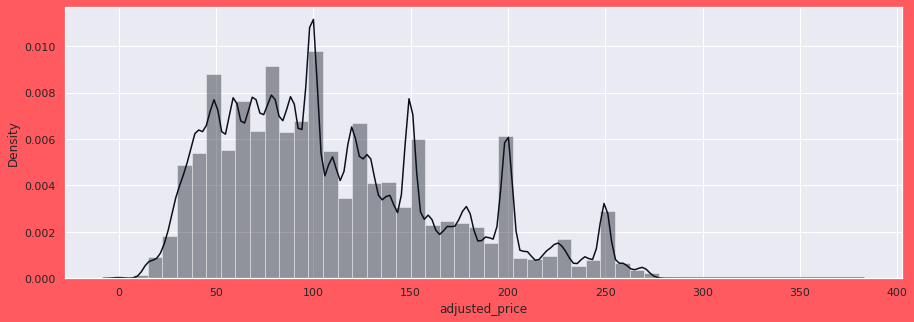

In [ ]:
# display the data distribution
distribution(calendar.adjusted_price)

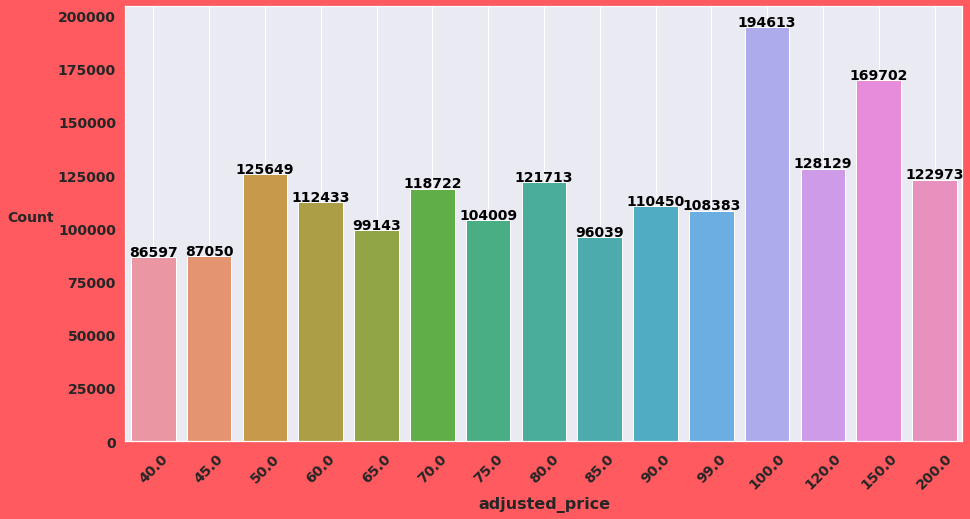

In [ ]:
# display the data distribution
dist_plot(calendar.adjusted_price,'adjusted_price', 15)

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


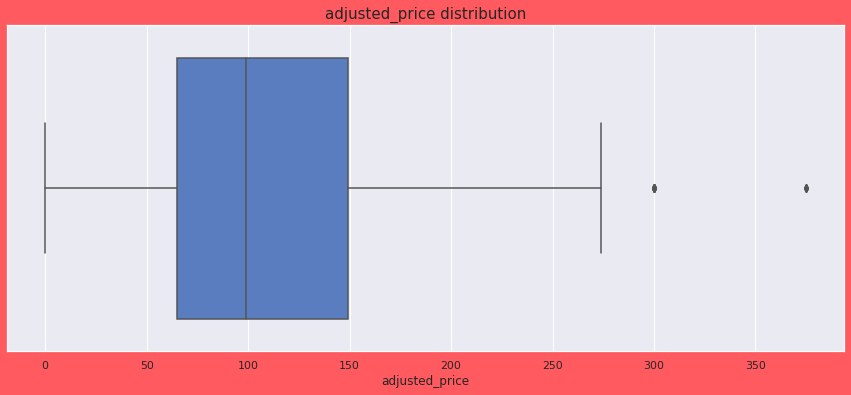

In [ ]:
outlierPlot(calendar.adjusted_price, 'adjusted_price')

In [ ]:
# calculate Q1 and Q3
Q1 = calendar['adjusted_price'].quantile(0.25)
Q3 = calendar['adjusted_price'].quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
calendar = calendar[ calendar['adjusted_price'] < (Q3+1.5*IQR)]
calendar.shape

(4968317, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


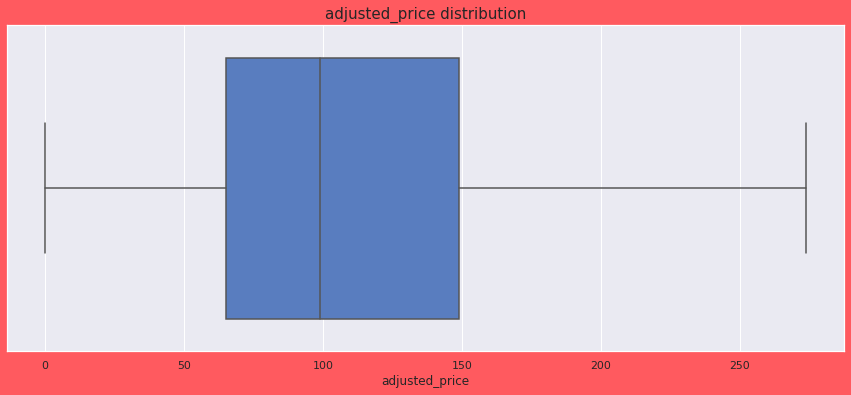

In [ ]:
outlierPlot(calendar.adjusted_price, 'adjusted_price')

> As we can see we don't have any outliers in `adjusted_price` column.

> ### <A> **Questions**

> <a> **When are the most popular times to hike up the price?**

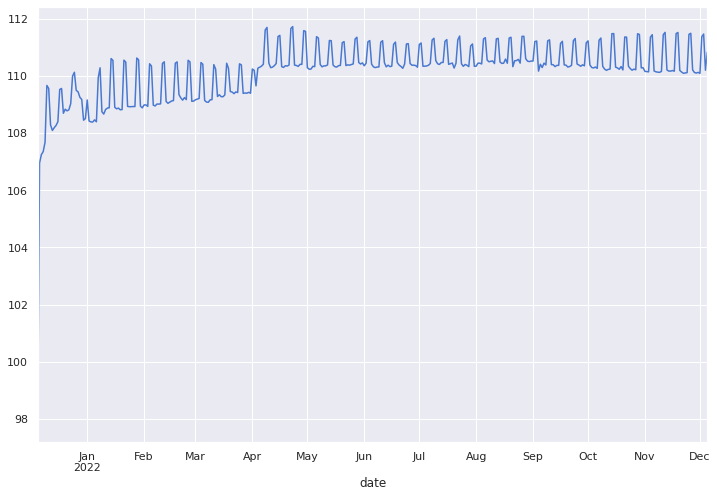

In [ ]:
calendar['adjusted_price'].groupby(calendar['date']).mean().plot(figsize=(12, 8))

> ### **minimum_nights/ maximum_nights**

In [ ]:
# all unique values for price column
calendar.minimum_nights.value_counts()

28.0      2924025
1.0        513554
30.0       337917
2.0        332120
3.0        205284
           ...   
35.0           49
1212.0         33
24.0           14
96.0            9
13.0            1
Name: minimum_nights, Length: 108, dtype: int64

In [ ]:
# display the data distribution
len(calendar.minimum_nights.value_counts())

108

In [ ]:
# the type of this column
calendar['minimum_nights'].dtypes

dtype('float64')

In [ ]:
# all unique values for price column
calendar.maximum_nights.value_counts()

1125.0    3435011
365.0      337635
30.0       206936
60.0       144570
90.0       125571
           ...   
118.0         316
19.0           50
18.0           39
23.0           38
88.0            1
Name: maximum_nights, Length: 183, dtype: int64

In [ ]:
# display the data distribution
len(calendar.maximum_nights.value_counts())

183

In [ ]:
# the type of this column
calendar['maximum_nights'].dtypes

dtype('float64')

> As we can see, the `[minimum_nights, maximum_nights]` columns are a `Float` columns, So we need to convert them to an `Int` columns

In [ ]:
# transform minimum / maximum nights to integer
calendar['minimum_nights'] = calendar['minimum_nights'].apply(pd.to_numeric).astype('Int64')
calendar['maximum_nights'] = calendar['maximum_nights'].apply(pd.to_numeric).astype('Int64')

In [ ]:
# the type of this column
calendar['minimum_nights'].dtypes

Int64Dtype()

In [ ]:
# the type of this column
calendar['maximum_nights'].dtypes

Int64Dtype()

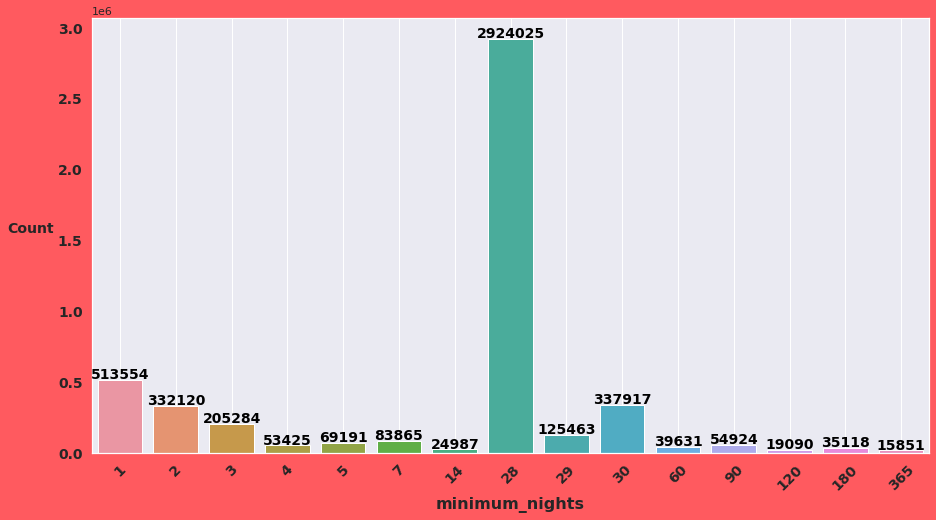

In [ ]:
# display the data distribution
dist_plot(calendar.minimum_nights,'minimum_nights', 15)

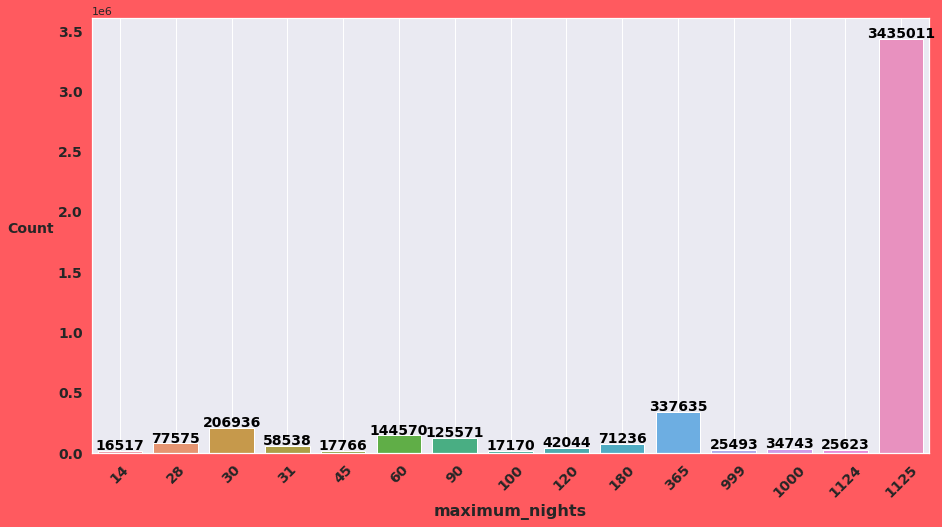

In [ ]:
# display the data distribution
dist_plot(calendar.maximum_nights, 'maximum_nights', 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


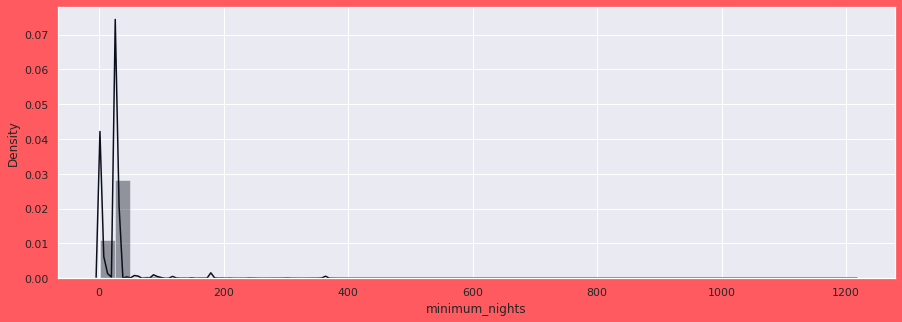

In [ ]:
# display the data distribution
distribution(calendar.minimum_nights)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


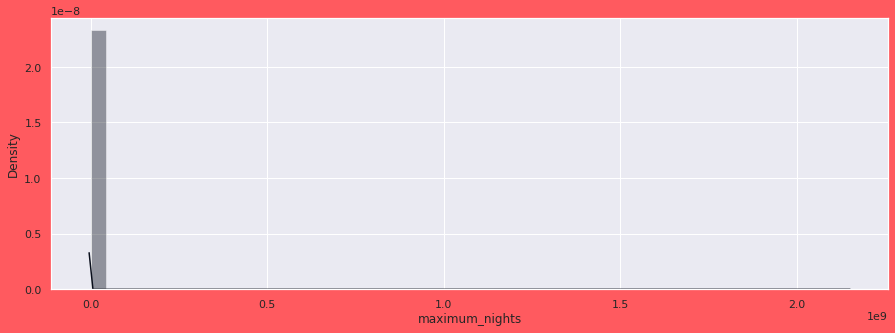

In [ ]:
# display the data distribution
distribution(calendar.maximum_nights)

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


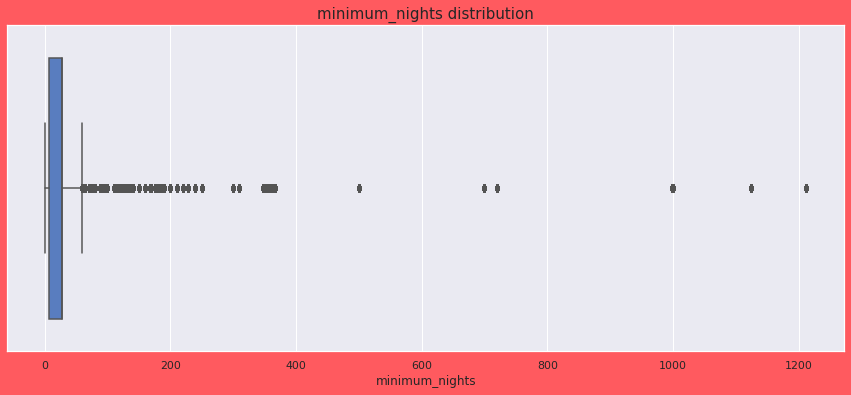

In [ ]:
outlierPlot(calendar.minimum_nights, 'minimum_nights')

In [ ]:
# calculate Q1 and Q3
Q1 = calendar['minimum_nights'].quantile(0.25)
Q3 = calendar['minimum_nights'].quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
calendar = calendar[ calendar['minimum_nights'] < (Q3+1.5*IQR)]
calendar.shape

(4748111, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


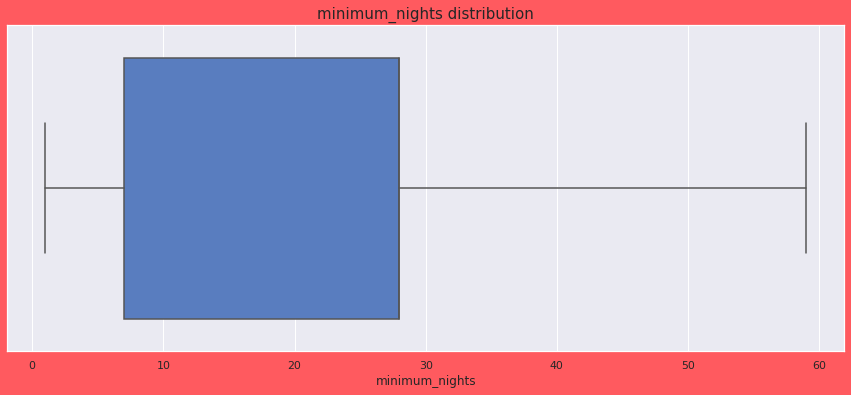

In [ ]:
outlierPlot(calendar.minimum_nights, 'minimum_nights')

> As we can see we don't have any outliers in `minimum_nights` column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


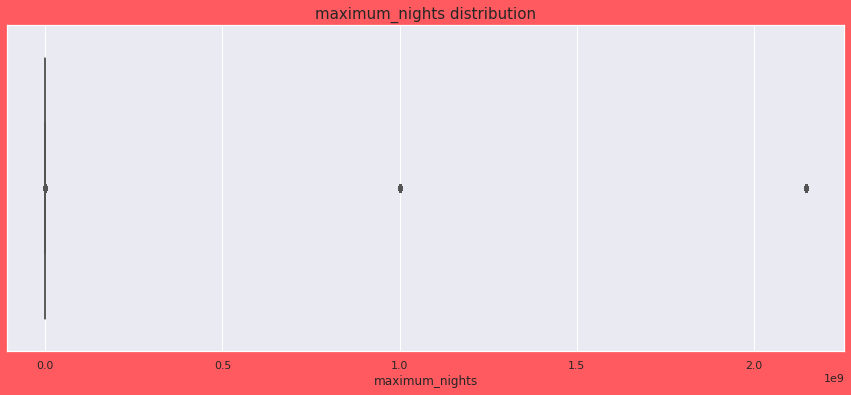

In [ ]:
outlierPlot(calendar.maximum_nights, 'maximum_nights')

In [ ]:
# calculate Q1 and Q3
Q1 = calendar['maximum_nights'].quantile(0.25)
Q3 = calendar['maximum_nights'].quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
calendar = calendar[ calendar['maximum_nights'] < (Q3+1.5*IQR)]
calendar.shape

(4746530, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


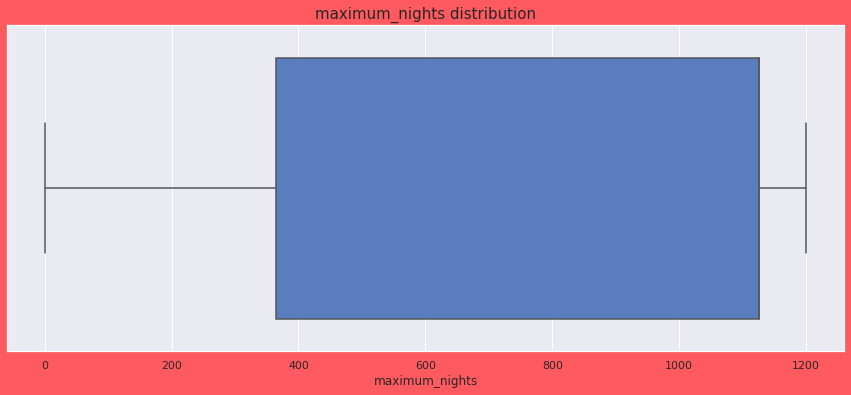

In [ ]:
outlierPlot(calendar.maximum_nights, 'maximum_nights')

> As we can see we don't have any outliers in `maximum_nights` column.

In [ ]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,557915,2021-12-06,0,85.0,85.0,30,730
366,41887,2021-12-06,0,70.0,70.0,28,200
367,41887,2021-12-07,0,70.0,70.0,28,200
368,41887,2021-12-08,0,70.0,70.0,28,200
369,41887,2021-12-09,0,70.0,70.0,28,200
...,...,...,...,...,...,...,...
5569540,53662853,2022-12-01,0,74.0,74.0,1,365
5569541,53662853,2022-12-02,0,78.0,78.0,1,365
5569542,53662853,2022-12-03,0,79.0,79.0,1,365
5569543,53662853,2022-12-04,0,74.0,74.0,1,365


> ## **Data Description After Preprocessing**

In [ ]:
#general summary of dataset
calendar.describe(include='all', datetime_is_numeric=True).transpose()

,count,mean,min,25%,50%,75%,max,std
listing_id,4746530.0,30776994.019797,23691.0,18331330.0,32083869.0,44266455.0,53684479.0,15556483.568577
date,4746530,2022-06-05 09:41:07.845269504,2021-12-05 00:00:00,2022-03-06 00:00:00,2022-06-05 00:00:00,2022-09-05 00:00:00,2022-12-05 00:00:00,NaN
available,4746530.0,0.342452,0.0,0.0,0.0,1.0,1.0,0.47453
price,4746530.0,110.365763,0.0,65.0,99.0,149.0,274.0,58.151232
adjusted_price,4746530.0,110.181539,0.0,65.0,99.0,149.0,274.0,57.994359
minimum_nights,4746530.0,21.298584,1.0,7.0,28.0,28.0,59.0,11.698186
maximum_nights,4746530.0,842.716819,1.0,365.0,1125.0,1125.0,1200.0,448.566394


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746530 entries, 0 to 5569544
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  Int64         
 6   maximum_nights  Int64         
dtypes: Int64(2), datetime64[ns](1), float64(2), int64(2)
memory usage: 298.8 MB


> ### **Duplicates**

In [ ]:
#check if there exist anu true value to check for duplications
calendar.duplicated(subset = None).value_counts()

False    4746530
dtype: int64

> As we can see, We don't have any duplicate value

> ### **Missing values**

In [ ]:
miss_number(calendar)

,Total missing,% missing
listing_id,0,0.0
date,0,0.0
available,0,0.0
price,0,0.0
adjusted_price,0,0.0
minimum_nights,0,0.0
maximum_nights,0,0.0


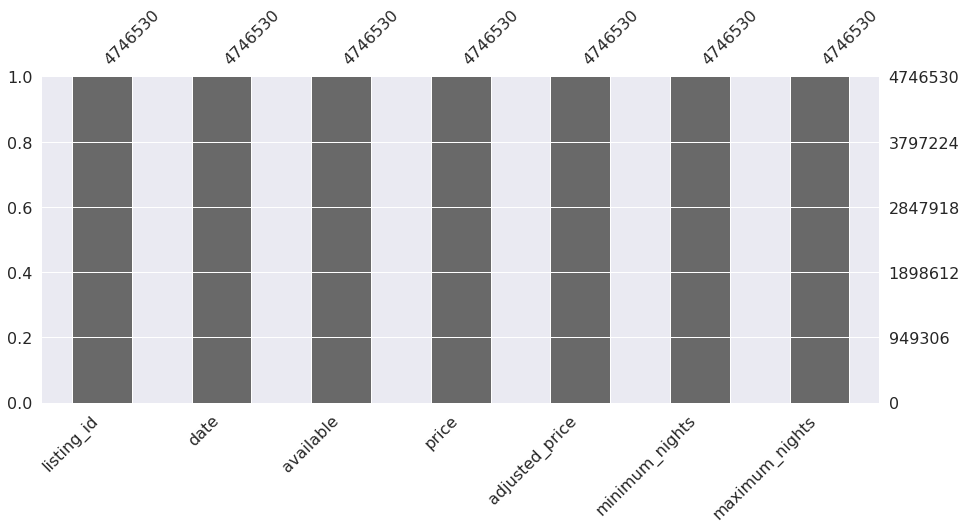

In [ ]:
#bar chart
msno.bar(calendar, figsize=(15,6))

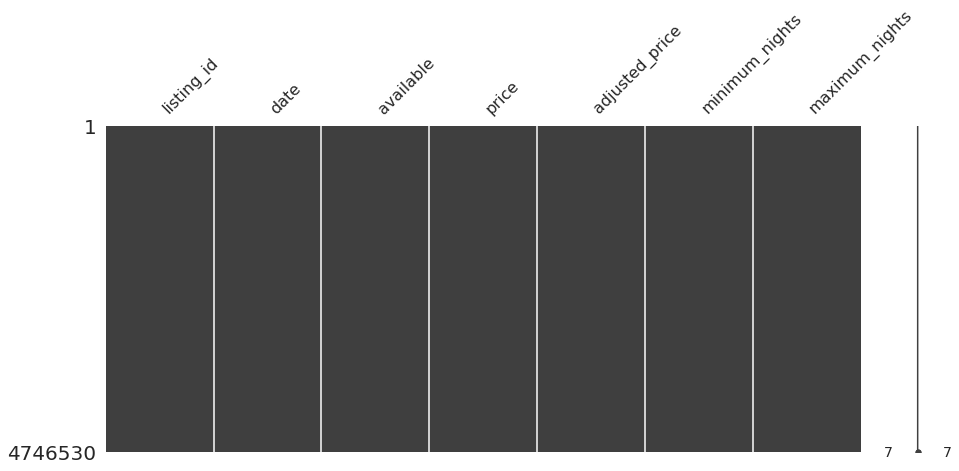

In [ ]:
#visualize missing values as a matrix
msno.matrix(calendar, figsize=(15,6))

In [ ]:
calendar.shape

(4746530, 7)

# <a>**Questions**

> ## <a> **Regression Question**

> ## Can we predict the price of the listings based on available features?

> ### Random Forest Regressor Listings

> We will Use a RandomForestRegressor for Regression question to pridict the price

In [ ]:
%%time
#select the target column and the training set from the data set
y = calendar['price']
x = calendar.drop(['price','date','listing_id','adjusted_price'], axis = 1)
# split the data into train and test to 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
#create a RandomForestRegressor model
rf_cl = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=3, n_jobs=-1)

#fit the model on the training data
rf_cl.fit(X_train, y_train)
#make a prediction
y_train_pred = rf_cl.predict(X_train)
y_test_pred = rf_cl.predict(X_test)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Results of sklearn.metrics:
MAE: 44.54400545229125
MSE: 3102.2026703696984
RMSE: 55.697420679684065
R-Squared: 0.08306612515318679
CPU times: user 38min 1s, sys: 3.48 s, total: 38min 4s
Wall time: 21min 8s


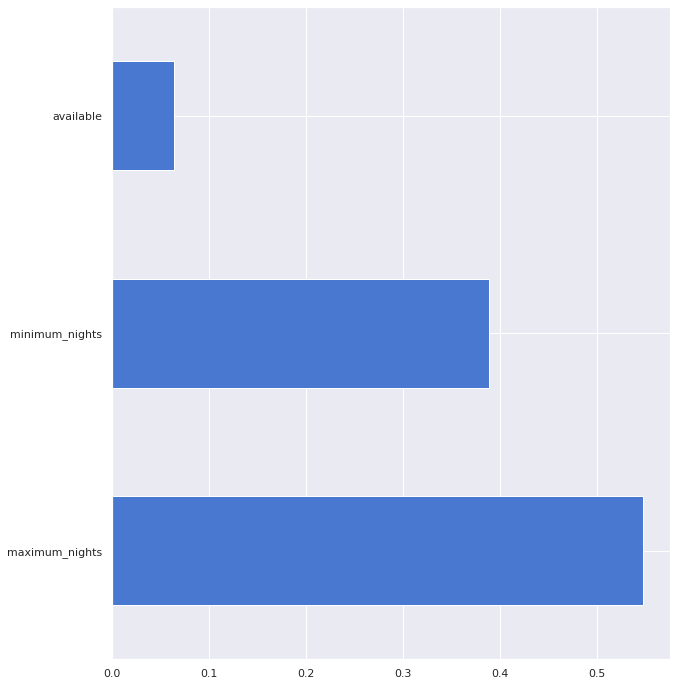

In [ ]:
# display the all features with the ratio of important
feat_imp = pd.Series(rf_cl.feature_importances_, index = X_train.columns)
feat_imp.nlargest(40).plot(kind='barh', figsize=(10,12))

In [ ]:
coefs_df = pd.DataFrame()
# display the all features with the ratio of important
coefs_df['Features'] = X_train.columns
coefs_df['coefs'] = 100*(rf_cl.feature_importances_)
coefs_df = coefs_df.sort_values('coefs', ascending=False)

In [ ]:
coefs_df

,Features,coefs
2,maximum_nights,54.751650
1,minimum_nights,38.818933
0,available,6.429418


In [ ]:
#select the important feature
imp_features = coefs_df['Features'][:3].values
imp_features

array(['maximum_nights', 'minimum_nights', 'available'], dtype=object)

In [ ]:
# select the target and training features
X = calendar[list(imp_features)]
Y = calendar['price']

In [ ]:
#splite the data into Train and Test by 80% for training to 20% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .2, random_state = 42, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(3797224, 3)
(949306, 3)
(3797224,)
(949306,)


In [ ]:
#fit the model on the important feature 
rf_cl.fit(xTrain, yTrain)
# make a prediction
y_train_pred = rf_cl.predict(xTrain)
y_test_pred = rf_cl.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred)
mse = metrics.mean_squared_error(yTest, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Results of sklearn.metrics:
MAE: 44.523189907937024
MSE: 3099.3739738871955
RMSE: 55.67202146399209
R-Squared: 0.0823232609782053


> ### XGB

In [ ]:
xTrain = xTrain.astype(float)
xTest = xTest.astype(float)

In [ ]:
%%time
xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(xTrain, yTrain)
y_train_pred = xgb_clf.predict(xTrain)
y_test_pred = xgb_clf.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred)
mse = metrics.mean_squared_error(yTest, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

[04:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results of sklearn.metrics:
MAE: 46.2607476920818
MSE: 3241.9642743223953
RMSE: 56.938249659805976
R-Squared: 0.040104476468183936
CPU times: user 1min 42s, sys: 462 ms, total: 1min 43s
Wall time: 1min 46s


> ### DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(random_state= 3)
D_Tree.fit(xTrain , yTrain)

DecisionTreeClassifier(random_state=3)

In [ ]:
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain))

D_Tree Train Score is :  0.09409268455060855


In [ ]:
y_train_pred_li = D_Tree.predict(xTrain)
y_test_pred_li = D_Tree.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 49.36916547456774
MSE: 4295.582818395755
RMSE: 65.54069589496098
R-Squared: -0.27185569285771427


> ## <a> **predictive analysis Question**

>  ## Can we predict the price level of the listings after converting the prices to three levels(categories): low, medium, high. according to: ’prices that are less or equal to `25%` as (`low`), `25% to 75%` as (`medium`), and `75%` or higher as (`high`)’ ?

> ### Price To Category

> #### Create Price_category column

In [ ]:
#Create a method for create a price_category column
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)

def price_category(x, Q1, Q3):
  if x <= Q1 : 
    return 'Low'
  elif x >= Q3:
    return 'High'
  else:
    return 'Medium'

In [ ]:
#apply the method on the price column to create a price category column
calendar['price_category'] = calendar['price'].apply(lambda x: price_category(x, Q1, Q3))

In [ ]:
# The number of the unique values
calendar.price_category.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
# all unique values for price_category column
calendar.price_category.value_counts()

Medium    2272117
Low       1238309
High      1236104
Name: price_category, dtype: int64

> `0` for `Low`

> `1` for `Medium`

> `2` for `High`

>Create a Price_category column from price column

In [ ]:
# The number of the unique values
len(calendar.price_category.value_counts())

3

In [ ]:
# the type of this column
calendar['price_category'].dtypes

dtype('O')

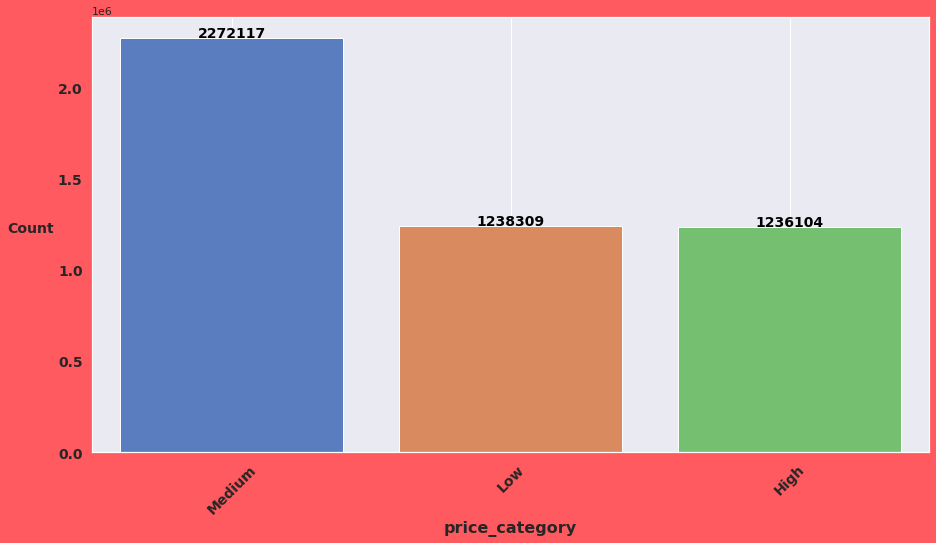

In [ ]:
# display the data distribution
dist_plot(calendar.price_category,'price_category', 3)

In [ ]:
#convert the categorical values to numerical
def price_category_coding(x):
  if x == 'Low' : 
    return 0
  elif x == 'Medium':
    return 1
  else:
    return 2

In [ ]:
# calendar['price_category'] = calendar['price']
calendar['price_category'] = calendar['price_category'].apply(lambda x: price_category_coding(x))

In [ ]:
# The number of the unique values
calendar.price_category.unique()

array([1, 2, 0])

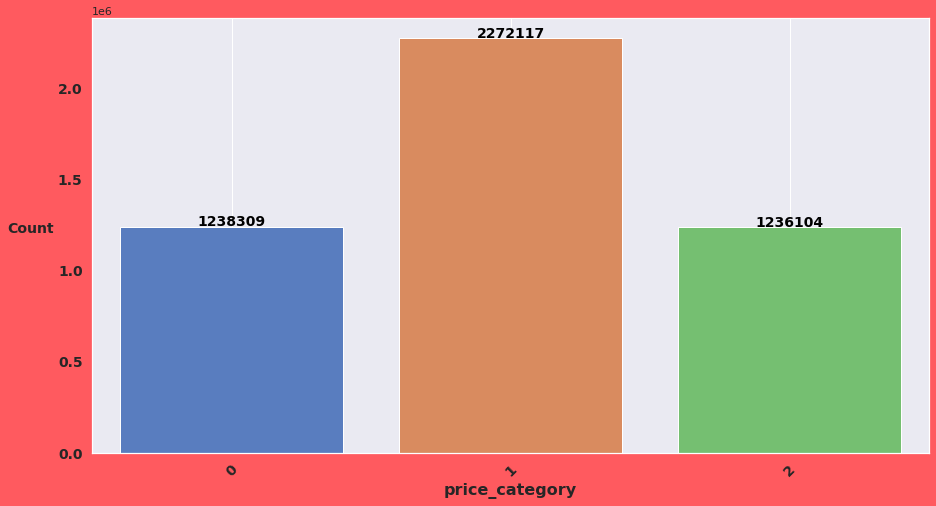

In [ ]:
# display the data distribution
dist_plot(calendar.price_category,'price_category', 3)

> #### RandomForest

> ##### **Feature Selection**

In [ ]:
# remove any columns duplicates
calendar_new = calendar.loc[:,~calendar.columns.duplicated()]

In [ ]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
calendar_new.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in calendar_new.columns.values]


In [ ]:
%%time
#select the target column and the training set from the data set
y = calendar_new['price_category']
x = calendar_new.drop(['price','date','listing_id','adjusted_price', 'price_category'], axis =1)
# split the data into train and test to 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
#create a RandomForestClassifier model
rf_cl_class = RandomForestClassifier(n_estimators=500, random_state = 3, n_jobs=-1)

#fit the model on the training data
rf_cl_class.fit(X_train, y_train)
#make a prediction
y_train_pred = rf_cl_class.predict(X_train)
y_test_pred = rf_cl_class.predict(X_test)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5009975708570261
MSE: 0.5218801945842542
RMSE: 0.7224127591510646
R-Squared: 6.43324516098609e-05
CPU times: user 48min 14s, sys: 13 s, total: 48min 27s
Wall time: 24min 57s


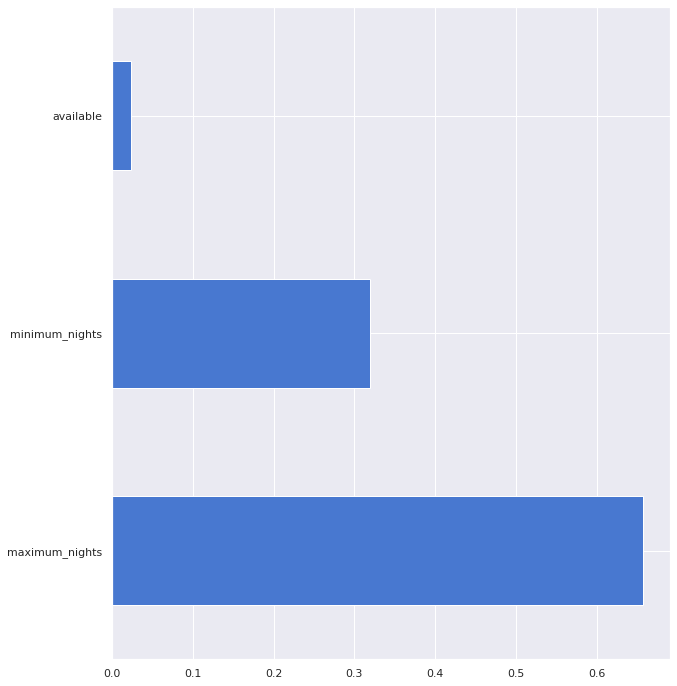

In [ ]:
# display the all features with the ratio of important
feat_imp = pd.Series(rf_cl_class.feature_importances_, index = X_train.columns)
feat_imp.nlargest(40).plot(kind='barh', figsize=(10,12))

In [ ]:
coefs_df = pd.DataFrame()
# display the all features with the ratio of important
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = 100*(rf_cl_class.feature_importances_)
coefs_df = coefs_df.sort_values('coefs', ascending=False)

In [ ]:
coefs_df.head(3)

,est_int,coefs
2,maximum_nights,65.766530
1,minimum_nights,31.905432
0,available,2.328038


In [ ]:
#select the important feature
imp_features = coefs_df['est_int'][:2].values
imp_features

array(['maximum_nights', 'minimum_nights'], dtype=object)

> ##### **Training RandomForest Model**

In [ ]:
# select the target and training features
X = calendar_new[list(imp_features)]
Y = calendar_new['price_category']

In [ ]:
#splite the data into Train and Test by 70% for training to 30% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 42, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(3322571, 2)
(1423959, 2)
(3322571,)
(1423959,)


In [ ]:
#fit the model on the important feature 
rf_cl_class.fit(xTrain, yTrain)
# make a prediction
y_train_pred_li = rf_cl_class.predict(xTrain)
y_test_pred_li = rf_cl_class.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5096761915195592
MSE: 0.5367247231135166
RMSE: 0.7326149896866133
R-Squared: -0.02937257385444192


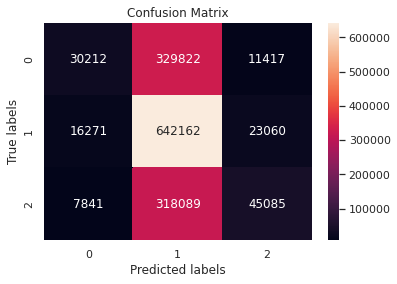

In [ ]:
#Calculating Prediction
yPred = rf_cl_class.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.56      0.08      0.14    371451
           1       0.50      0.94      0.65    681493
           2       0.57      0.12      0.20    371015

    accuracy                           0.50   1423959
   macro avg       0.54      0.38      0.33   1423959
weighted avg       0.53      0.50      0.40   1423959



> #### XGB

In [ ]:
#convert the xTrain, xTest to float data type
xTrain = xTrain.astype(float)
xTest = xTest.astype(float)

In [ ]:
%%time
#create a XGBClassifier model
xgb_clf = xgb.XGBClassifier()
#fit the model on the training data
xgb_clf.fit(xTrain, yTrain)
#make a prediction
y_train_pred = xgb_clf.predict(xTrain)
y_test_pred = xgb_clf.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred)
mse = metrics.mean_squared_error(yTest, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5163322820390194
MSE: 0.5221161564342793
RMSE: 0.7225760558130053
R-Squared: -0.0013551242469449498
CPU times: user 5min 44s, sys: 854 ms, total: 5min 45s
Wall time: 5min 48s


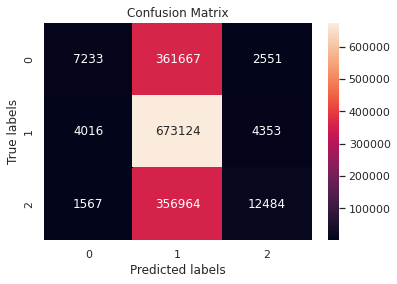

In [ ]:
#Calculating Prediction
yPred = xgb_clf.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.56      0.02      0.04    371451
           1       0.48      0.99      0.65    681493
           2       0.64      0.03      0.06    371015

    accuracy                           0.49   1423959
   macro avg       0.56      0.35      0.25   1423959
weighted avg       0.55      0.49      0.34   1423959



> #### DT

In [ ]:
# create a decison tree model
D_Tree_model = DecisionTreeClassifier(random_state=3)
D_Tree_model.fit(xTrain , yTrain)

DecisionTreeClassifier(random_state=3)

In [ ]:
#RandomizedSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
%%time
k_range = list(i for i in range(1, 20))
get_grid_para = {"criterion" : ["gini" , "entropy"], "max_depth" : k_range, "min_samples_leaf": k_range}
grid_result = RandomizedSearchCV(D_Tree_model , get_grid_para, cv= 3, n_iter=30, n_jobs= -1, scoring = 'accuracy')
grid_result.fit(xTrain, yTrain)

CPU times: user 6.22 s, sys: 3.23 s, total: 9.44 s
Wall time: 2min 9s


In [ ]:
print(grid_result.best_params_, '  \n' , grid_result.best_estimator_ , '\n The Best Score : ' , grid_result.best_score_)

{'min_samples_leaf': 13, 'max_depth': 17, 'criterion': 'gini'}   
 DecisionTreeClassifier(max_depth=17, min_samples_leaf=13, random_state=3) 
 The Best Score :  0.50420893942901


In [ ]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "gini", max_depth= 17 , min_samples_leaf= 13 , random_state= 3)
D_Tree.fit(xTrain , yTrain)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=13, random_state=3)

In [ ]:
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain))

D_Tree Train Score is :  0.5043997554905524


In [ ]:
#make a prediction
y_train_pred_li = D_Tree.predict(xTrain)
y_test_pred_li = D_Tree.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5097000686115261
MSE: 0.5367626455536992
RMSE: 0.7326408707912078
R-Squared: -0.029445304470671285


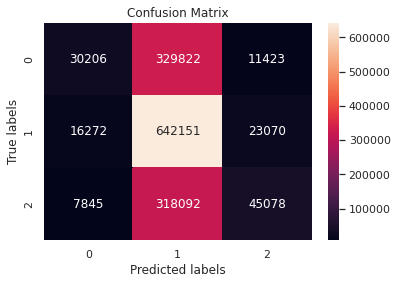

In [ ]:
#Calculating Prediction
yPred = D_Tree.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.56      0.08      0.14    371451
           1       0.50      0.94      0.65    681493
           2       0.57      0.12      0.20    371015

    accuracy                           0.50   1423959
   macro avg       0.54      0.38      0.33   1423959
weighted avg       0.53      0.50      0.40   1423959



> #### LR

In [ ]:
#RandomizedSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
%%capture
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.001,.009,0.01,.09,1,5,10,25, 1e5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_clf_acc = RandomizedSearchCV(clf, grid_values, cv= 2, n_iter=30, n_jobs= -1, scoring = 'accuracy')
grid_clf_acc.fit(xTrain, yTrain)

In [ ]:
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_estimator_)

0.47873288486540816
{'solver': 'saga', 'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, solver='saga')


In [ ]:
#train the model with optimal hyperparameters
%%capture
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'saga', C = 1, random_state=3, max_iter = 500)
LogisticRegressionModel.fit(xTrain, yTrain)

In [ ]:
#test the accuracy of model on training set
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(xTrain, yTrain))

LogisticRegressionModel Train Score is :  0.4787328848653648


In [ ]:
#make a prediction
y_train_pred_li = LogisticRegressionModel.predict(xTrain)
y_test_pred_li = LogisticRegressionModel.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5214096754190254
MSE: 0.5214096754190254
RMSE: 0.722087027593645
R-Squared: -1.798038558042947e-07


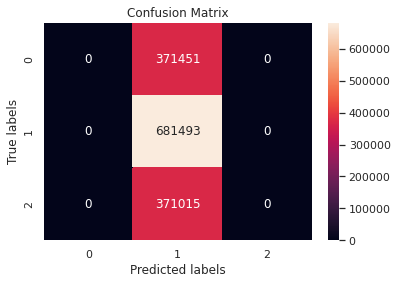

In [ ]:
#Calculating Prediction
yPred = LogisticRegressionModel.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    371451
           1       0.48      1.00      0.65    681493
           2       0.00      0.00      0.00    371015

    accuracy                           0.48   1423959
   macro avg       0.16      0.33      0.22   1423959
weighted avg       0.23      0.48      0.31   1423959



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
